In [6]:
from superpixels import export_superpixel_crf_masks_for_dataset
from dataset import Colonoscopy_Dataset
from tools import (
    return_files_in_directory,
    human_sort
    )
from config import *
import os
from embeddings import ResnetFeatureExtractor, export_superpixel_embedding_masks
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
import torchvision
from tqdm import tqdm
from tools import visualize
from embeddings import get_mean_embeddings

In [7]:
# A model wrapper that gets a resnet model and returns the features before the fully connected layer.
resnet = torchvision.models.resnet50(pretrained=True)
resnet.eval()
feature_extract_model = ResnetFeatureExtractor(resnet)
feature_extract_model.to(DEVICE)

ResnetFeatureExtractor(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [8]:
DATA_DIR = BASE_DIR + '/data'
image_files = return_files_in_directory(DATA_DIR + "/original", ".tif")
box_files = return_files_in_directory(DATA_DIR + "/boxmasks", ".png")
# Ensure files are in correct order
human_sort(image_files)
human_sort(box_files)
# image_files = image_files[:10]
# box_files = box_files[:10]
# Now it is important to only take the training dataset so the embeddings from the other sets aren't considered in the 
# mean embedding
# TODO: Check if the random state is persistant across restarts
X_train, X_test, y_train, y_test = train_test_split(image_files, box_files, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11111, random_state=1) # 0.1111 x 0.9 = 0.1

dataset = Colonoscopy_Dataset(X_train[:2], y_train[:2])
data_loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=0)

TESTING_DIR = DATA_DIR + "/testing/robust_boxshrink"
EMBEDDING_DIR = DATA_DIR + "/testing/mean_embeddings/"
if not os.path.exists(TESTING_DIR):
    os.makedirs(TESTING_DIR)

if not os.path.exists(EMBEDDING_DIR):
    os.makedirs(EMBEDDING_DIR)

In [12]:
## Get mean embeddings
# get_mean_embeddings(data_loader, model=feature_extract_model, embedding_dir=EMBEDDING_DIR)
f = torch.load(EMBEDDING_DIR + "foreground_embeddings_ns250_th01_sp_crf_masks.pt")
b = torch.load(EMBEDDING_DIR + "background_embeddings_ns250_th01_sp_crf_masks.pt")
mean_f = torch.mean(f, dim=0)
mean_b = torch.mean(b, dim=0)
print(torch.mean(mean_f))
print(torch.mean(mean_b))
train_inputs, train_labels, train_org_images = next(iter(data_loader))

0it [00:00, ?it/s]

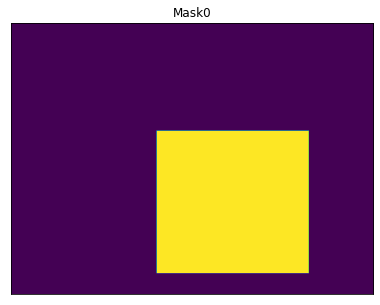

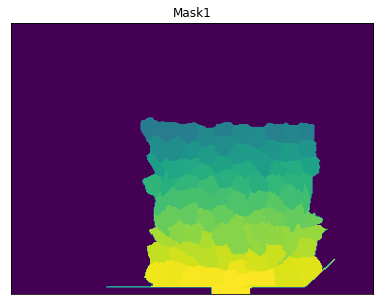

outer_superpixels: Type <class 'list'>, [128, 257, 129, 260, 134, 264, 265, 139, 140, 267, 270, 271, 144, 145, 146, 143, 279, 280, 153, 154, 285, 286, 158, 288, 161, 290, 291, 292, 162, 294, 164, 169, 170, 177, 182, 189, 192, 204, 205, 206, 209, 219, 224, 226, 227, 230, 245, 247, 249, 124, 125, 126, 127]
indexes_outer: Type <class 'list'>, [4, 65, 5, 67, 6, 68, 69, 7, 8, 70, 71, 72, 10, 11, 12, 9, 75, 76, 14, 15, 77, 78, 16, 79, 17, 80, 81, 82, 18, 83, 20, 22, 23, 25, 28, 34, 35, 40, 41, 42, 45, 48, 50, 52, 53, 54, 61, 62, 64, 0, 1, 2, 3]
outer_foreground_embedding: Type <class 'torch.Tensor'>, torch.Size([53, 2048])
close_foreground_outer_superpixels: Type <class 'list'>, []
to_be_dropped: Type <class 'list'>, [128, 257, 129, 260, 134, 264, 265, 139, 140, 267, 270, 271, 144, 145, 146, 143, 279, 280, 153, 154, 285, 286, 158, 288, 161, 290, 291, 292, 162, 294, 164, 169, 170, 177, 182, 189, 192, 204, 205, 206, 209, 219, 224, 226, 227, 230, 245, 247, 249, 124, 125, 126, 127]
relevant_supe

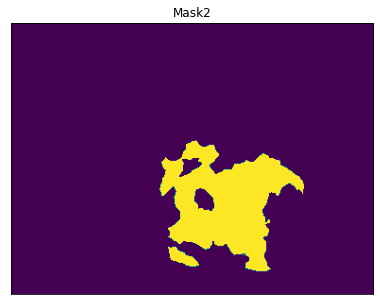

1it [00:06,  6.02s/it]

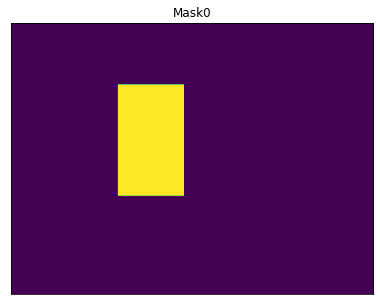

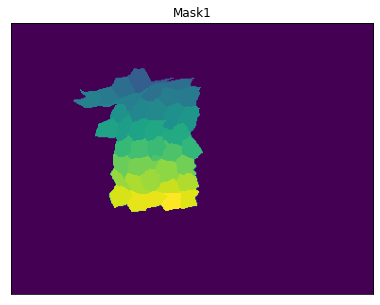

outer_superpixels: Type <class 'list'>, [128, 139, 141, 143, 163, 165, 167, 178, 179, 184, 185, 63, 193, 197, 200, 202, 203, 76, 77, 79, 210, 86, 87, 88, 92, 105, 108, 111, 118, 121, 122, 125]
indexes_outer: Type <class 'list'>, [18, 19, 20, 21, 24, 25, 26, 28, 29, 30, 31, 0, 32, 33, 34, 35, 36, 1, 2, 3, 37, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17]
outer_foreground_embedding: Type <class 'torch.Tensor'>, torch.Size([32, 2048])
close_foreground_outer_superpixels: Type <class 'list'>, []
to_be_dropped: Type <class 'list'>, [128, 139, 141, 143, 163, 165, 167, 178, 179, 184, 185, 63, 193, 197, 200, 202, 203, 76, 77, 79, 210, 86, 87, 88, 92, 105, 108, 111, 118, 121, 122, 125]
relevant_superpixels: Type <class 'list'>, [90, 98, 99, 147, 151, 174]
not_in_relevant_superpixels: Type <class 'list'>, [tensor(1), tensor(2), tensor(3), tensor(4), tensor(5), tensor(6), tensor(7), tensor(8), tensor(9), tensor(10), tensor(11), tensor(12), tensor(13), tensor(14), tensor(15), tensor(16), tensor(17), tens

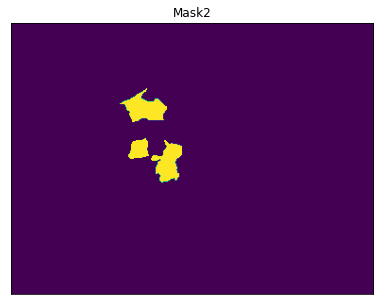

2it [00:12,  6.50s/it]


In [13]:
export_superpixel_embedding_masks(dataset=dataset, mean_background_embedding=b, mean_foreground_embedding=f, export_path=TESTING_DIR, model=feature_extract_model)